<a href="https://colab.research.google.com/github/koksal100/Deep-Learning/blob/main/Binary_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls

drive  sample_data


In [4]:
import os

folder_path = '/content/drive/MyDrive/Colab Notebooks/tom_and_jerry'
files = os.listdir(folder_path)

for file in files:
    print(file)


jerry
tom


In [5]:
# Walk through Cats and Dogs directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Colab Notebooks/tom_and_jerry"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/drive/MyDrive/Colab Notebooks/tom_and_jerry'.
There are 0 directories and 1240 images in '/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/jerry'.
There are 0 directories and 1930 images in '/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/tom'.


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_folder):
  target_dir="/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/"+target_folder
  random_image = random.sample(os.listdir(target_dir), 1)
  img = mpimg.imread(target_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(str(target_folder))
  plt.axis("off");
  print(img.shape)
  return img

(720, 1280, 3)


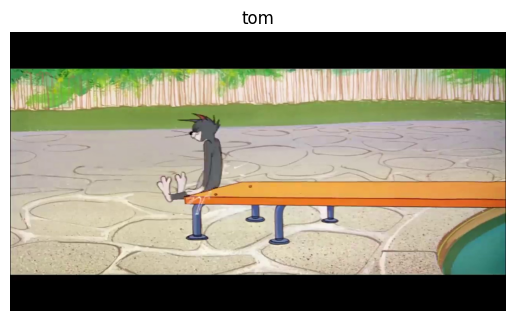

In [7]:
tom=view_random_image("tom")

(480, 854, 3)


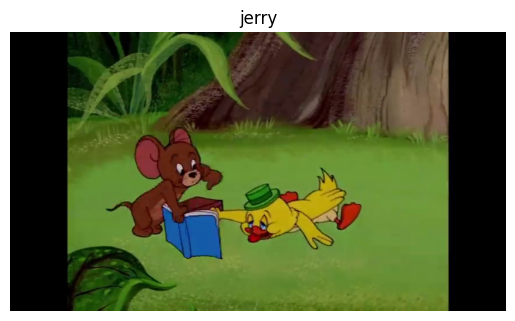

In [8]:
jerry=view_random_image("jerry")

In [9]:
import os

print("Tom directory contents:", os.listdir("/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/tom"))
print("Jerry directory contents:", os.listdir("/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/jerry"))


Tom directory contents: ['frame3560.jpg', 'frame3482.jpg', 'frame3558.jpg', 'frame3499.jpg', 'frame3493.jpg', 'frame3490.jpg', 'frame3568.jpg', 'frame3575.jpg', 'frame35.jpg', 'frame3571.jpg', 'frame3569.jpg', 'frame3557.jpg', 'frame3486.jpg', 'frame3487.jpg', 'frame3506.jpg', 'frame3505.jpg', 'frame3559.jpg', 'frame3503.jpg', 'frame3561.jpg', 'frame3496.jpg', 'frame3491.jpg', 'frame3531.jpg', 'frame3504.jpg', 'frame3494.jpg', 'frame3492.jpg', 'frame3489.jpg', 'frame3495.jpg', 'frame3574.jpg', 'frame3483.jpg', 'frame3500.jpg', 'frame3532.jpg', 'frame3485.jpg', 'frame3529.jpg', 'frame3498.jpg', 'frame3534.jpg', 'frame3573.jpg', 'frame3484.jpg', 'frame3533.jpg', 'frame365.jpg', 'frame3635.jpg', 'frame3714.jpg', 'frame3597.jpg', 'frame369.jpg', 'frame3676.jpg', 'frame3628.jpg', 'frame3718.jpg', 'frame3715.jpg', 'frame3656.jpg', 'frame3675.jpg', 'frame3713.jpg', 'frame3663.jpg', 'frame3637.jpg', 'frame3587.jpg', 'frame3613.jpg', 'frame3657.jpg', 'frame3598.jpg', 'frame3638.jpg', 'frame3665

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range = 45)
data_dir="/content/drive/MyDrive/Colab Notebooks/tom_and_jerry"


train_data = datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              subset="training",  # Use "training" for the training set
                                              seed=42,
                                              shuffle=True)

# Use flow_from_directory for test data
test_data = datagen.flow_from_directory(data_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             subset="validation",  # Use "validation" for the test set
                                             seed=42,
                                              shuffle=True)


Found 2536 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


In [11]:
train_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [12]:
train_data.batch_size,train_data.image_shape

(32, (224, 224, 3))

In [13]:
train_data.samples,train_data.color_mode

(2536, 'rgb')

In [ ]:
model1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

In [23]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_16 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_17 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 109, 109, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 107, 107, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 105, 105, 10)      910       
                                                      

<Axes: >

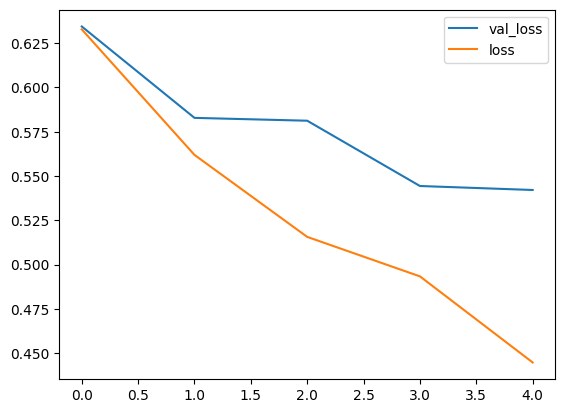

In [24]:
pd.DataFrame(history_1.history)[["val_loss","loss"]].plot()

In [44]:
#Let's try the same model but one less convolutional model and more epochs.

In [26]:
model2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_2 = model1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
80/80 [==============================] - 60s 749ms/step - loss: 0.6137 - accuracy: 0.6707 - val_loss: 0.6333 - val_accuracy: 0.6530
Epoch 2/10
80/80 [==============================] - 57s 720ms/step - loss: 0.5117 - accuracy: 0.7496 - val_loss: 0.5602 - val_accuracy: 0.7508
Epoch 3/10
80/80 [==============================] - 59s 738ms/step - loss: 0.4574 - accuracy: 0.7938 - val_loss: 0.4681 - val_accuracy: 0.7918
Epoch 4/10
80/80 [==============================] - 57s 709ms/step - loss: 0.3823 - accuracy: 0.8328 - val_loss: 0.4968 - val_accuracy: 0.7681
Epoch 5/10
80/80 [==============================] - 59s 733ms/step - loss: 0.3579 - accuracy: 0.8466 - val_loss: 0.4601 - val_accuracy: 0.7950
Epoch 6/10
80/80 [==============================] - 57s 706ms/step - loss: 0.3329 - accuracy: 0.8549 - val_loss: 0.5599 - val_accuracy: 0.7319
Epoch 7/10
80/80 [==============================] - 57s 710ms/step - loss: 0.2965 - accuracy: 0.8821 - val_loss: 0.4146 - val_accuracy: 0.8202

<Axes: >

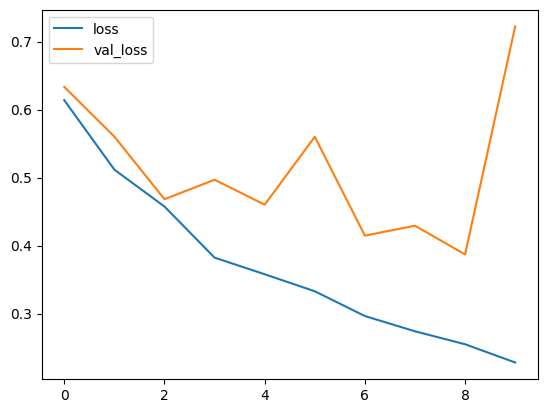

In [31]:
pd.DataFrame(history_2.history)[["loss","val_loss"]].plot()

In [32]:
#Until the last epoch it generally learn well, let's consider the epoch number effect and try data augmentation with the same model

In [14]:
datagen = ImageDataGenerator(                 rescale=1/255.,validation_split=0.2,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True,) # flip the image on the horizontal axis

train_data = datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              subset="training",  # Use "training" for the training set
                                              seed=42,
                                              shuffle=True)

# Use flow_from_directory for test data
test_data = datagen.flow_from_directory(data_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             subset="validation",  # Use "validation" for the test set
                                             seed=42,
                                              shuffle=True)


# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

Found 2536 images belonging to 2 classes.
Found 634 images belonging to 2 classes.


(32, 32)

In [40]:
model3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model1.fit(train_data,
                        epochs=8,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/8
80/80 [==============================] - 59s 737ms/step - loss: 0.4240 - accuracy: 0.8182 - val_loss: 0.4790 - val_accuracy: 0.7808
Epoch 2/8
80/80 [==============================] - 60s 753ms/step - loss: 0.3620 - accuracy: 0.8391 - val_loss: 0.4627 - val_accuracy: 0.8076
Epoch 3/8
80/80 [==============================] - 58s 725ms/step - loss: 0.3325 - accuracy: 0.8573 - val_loss: 0.4556 - val_accuracy: 0.8328
Epoch 4/8
80/80 [==============================] - 60s 749ms/step - loss: 0.3169 - accuracy: 0.8711 - val_loss: 0.3995 - val_accuracy: 0.8438
Epoch 5/8
80/80 [==============================] - 57s 716ms/step - loss: 0.3257 - accuracy: 0.8770 - val_loss: 0.4437 - val_accuracy: 0.7886
Epoch 6/8
80/80 [==============================] - 58s 732ms/step - loss: 0.2823 - accuracy: 0.8904 - val_loss: 0.3578 - val_accuracy: 0.8517
Epoch 7/8
80/80 [==============================] - 57s 714ms/step - loss: 0.2743 - accuracy: 0.8896 - val_loss: 0.3490 - val_accuracy: 0.8722
Epoch 

<Axes: >

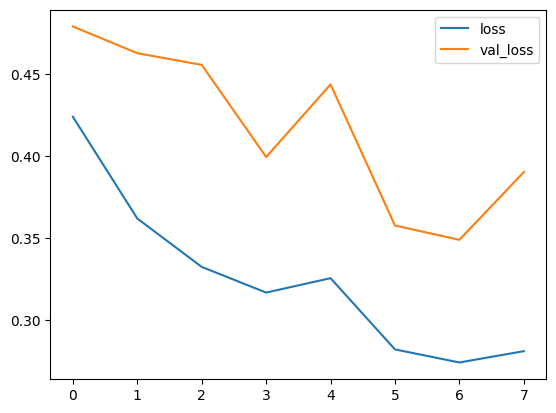

In [43]:
pd.DataFrame(history_3.history)[["loss","val_loss"]].plot()

In [44]:
#Even the model show overfitting in the last epoch it reach lowest valiadtion loss and highest validation accuracy in the seventh epoch.
#Let's keep it in some manner and add different overfitting barriers.

In [17]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, verbose=1, mode='min', restore_best_weights=True)
early_stopping1 = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001, verbose=1, mode='max', restore_best_weights=True)

model4=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=3,
                           padding="valid",
                           activation="relu",
                           input_shape=(224,224,3),
                            kernel_regularizer=l2(0.01)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_4 = model4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[early_stopping,early_stopping1])

Epoch 1/10
80/80 [==============================] - 346s 4s/step - loss: 0.6953 - accuracy: 0.6175 - val_loss: 0.6878 - val_accuracy: 0.6341
Epoch 2/10
80/80 [==============================] - 321s 4s/step - loss: 0.6496 - accuracy: 0.6707 - val_loss: 0.6412 - val_accuracy: 0.6546
Epoch 3/10
80/80 [==============================] - 320s 4s/step - loss: 0.5986 - accuracy: 0.7086 - val_loss: 0.6438 - val_accuracy: 0.6751
Epoch 4/10
80/80 [==============================] - 314s 4s/step - loss: 0.5129 - accuracy: 0.7756 - val_loss: 0.4623 - val_accuracy: 0.7934
Epoch 5/10
80/80 [==============================] - 331s 4s/step - loss: 0.4251 - accuracy: 0.8210 - val_loss: 0.3859 - val_accuracy: 0.8391
Epoch 6/10
80/80 [==============================] - 314s 4s/step - loss: 0.4105 - accuracy: 0.8348 - val_loss: 0.4518 - val_accuracy: 0.8091
Epoch 7/10
80/80 [==============================] - 321s 4s/step - loss: 0.3704 - accuracy: 0.8620 - val_loss: 0.3633 - val_accuracy: 0.8580
Epoch 8/10
80

<Axes: >

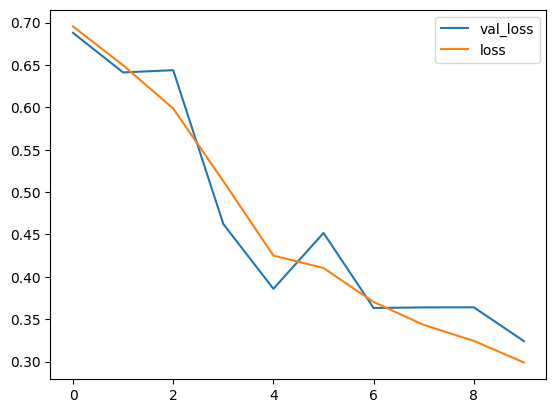

In [19]:
pd.DataFrame(history_4.history)[["val_loss","loss"]].plot()

1/1 [==============================] - 0s 45ms/step
0
1/1 [==============================] - 0s 45ms/step
1
1/1 [==============================] - 0s 48ms/step
0
1/1 [==============================] - 0s 43ms/step
1


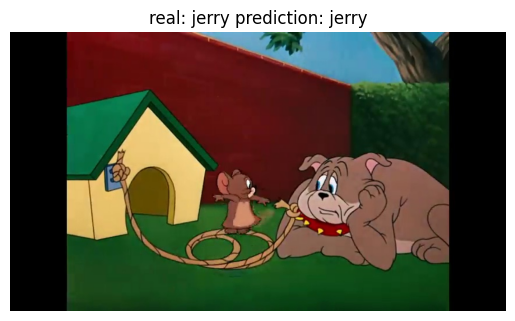

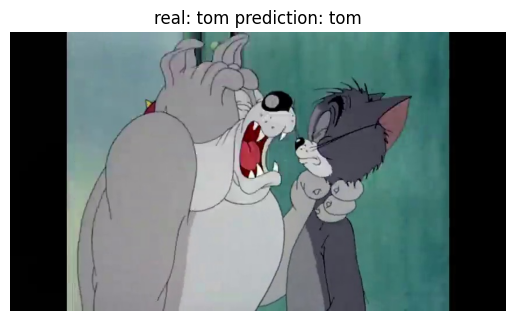

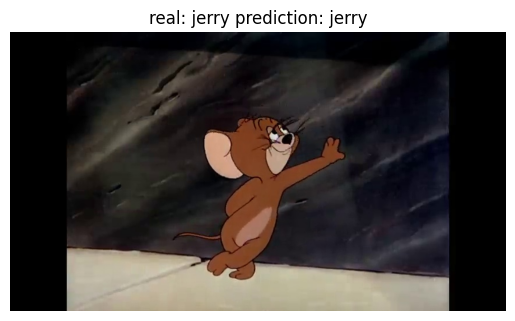

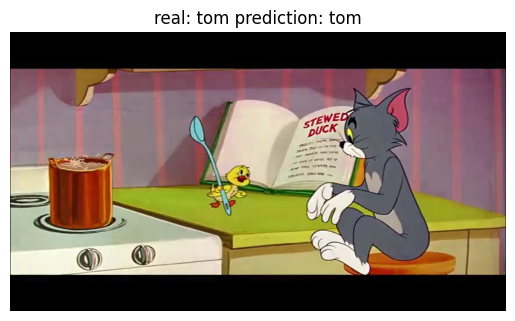

In [103]:
import numpy as np
def predict_random_image():
  plt.figure()
  target_folder=""
  if np.random.randint(10) >=5:
      target_folder="tom"
  else:
      target_folder="jerry"
  target_dir="/content/drive/MyDrive/Colab Notebooks/tom_and_jerry/"+target_folder
  random_image = random.sample(os.listdir(target_dir), 1)
  img = mpimg.imread(target_dir + "/" + random_image[0])
  resized_image = tf.image.resize(img, (224, 224))
  resized_image=resized_image/255.
  prediction=int(np.round(model4.predict(tf.expand_dims(resized_image,axis=0))))
  print(prediction)
  plt.imshow(img)
  prediction=os.listdir("/content/drive/MyDrive/Colab Notebooks/tom_and_jerry")[prediction]
  plt.title("real: "+target_folder+" prediction: "+prediction)
  plt.axis("off");


predict_random_image()
predict_random_image()
predict_random_image()
predict_random_image()



In [75]:
len(train_data.labels), train_data.labels.sum()

(2536, 1544)

In [76]:
len(test_data.labels), test_data.labels.sum()

(634, 386)